In [22]:
import pandas as pd
df = pd.read_csv('25_oct_7am_static_knn.csv')
df.head()
# print(df['pm'])

,latitude,longitude,pm
0,28.815329,77.153010,307.00
1,28.470691,77.109936,158.47
2,28.776200,77.051074,417.00
3,28.551201,77.273574,196.45
4,28.750050,77.111261,274.19


In [23]:
from sklearn.model_selection import train_test_split
train , test = train_test_split(df, test_size = 0.3)

x_train = train.drop('pm', axis=1)
y_train = train['pm']

x_test = test.drop('pm', axis = 1)
y_test = test['pm']

In [24]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

x_train_scaled = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train_scaled)

x_test_scaled = scaler.fit_transform(x_test)
x_test = pd.DataFrame(x_test_scaled)

In [25]:
#import required packages
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline

In [26]:
rmse_val = [] #to store rmse values for different k
for K in range(6):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(x_train, y_train)  #fit the model
    pred=model.predict(x_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 127.63543725958102
RMSE value for k=  2 is: 103.01927414054346
RMSE value for k=  3 is: 66.70799092377479
RMSE value for k=  4 is: 59.25229870130685
RMSE value for k=  5 is: 73.66320247360052
RMSE value for k=  6 is: 90.8818689797875


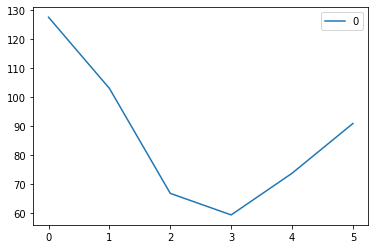

In [27]:
#plotting the rmse values against k values
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

In [28]:
# ---------------------- MAIN CODE --------------------------

import pandas as pd
df = pd.read_csv('25_oct_7am_static_knn.csv')
df.head()

from sklearn.model_selection import train_test_split
train , test = train_test_split(df, test_size = 0.3,random_state = 1)

x_train = train.drop('pm', axis=1)
y_train = train['pm']

x_test = test.drop('pm', axis = 1)
y_test = test['pm']

from sklearn.model_selection import GridSearchCV
params = {'n_neighbors':[1,2,3,4,5,6]}

knn = neighbors.KNeighborsRegressor(weights = 'distance')
#leave one out cross validation
model = GridSearchCV(knn, params, cv=len(x_train),scoring = "neg_root_mean_squared_error")
model.fit(x_train,y_train)
model.best_params_


{'n_neighbors': 6}

In [29]:

best_k = model.best_params_['n_neighbors']
pred=model.predict(x_test) #make prediction on test set
print(y_test)
print(pred)
error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
rmse_val.append(error) #store rmse values
print('RMSE value for k= ' , best_k , 'is:', error)

24    207.00
17     98.60
19    278.00
20    198.46
14    271.00
3     196.45
22    160.32
10    118.42
21    284.00
Name: pm, dtype: float64
[216.12205974 234.9084137  285.9347203  236.95921594 336.40005915
 239.11558858 264.34114682 207.8791786  314.84844836]
RMSE value for k=  6 is: 71.55482405125866


In [9]:
## Entire data


bus_df = pd.read_csv('2020-10-25_all.csv',parse_dates = ["dateTime"])
# bus_df.head()

In [126]:
# bus_df.iloc[0]['dateTime']


In [10]:
# get target hour bucket
for i in range(24):
    hour_bucket = bus_df.loc[(bus_df.dateTime.apply(lambda x: x.hour) == i), ['lat','long','pm2_5']]
#     print(len(hour_bucket))
hour_bucket = bus_df.loc[(bus_df.dateTime.apply(lambda x: x.hour) == 7), ['lat','long','pm2_5']]
    

In [11]:

from sklearn.model_selection import train_test_split
train , test = train_test_split(hour_bucket, test_size = 0.3,random_state = 1)

x_train = train.drop('pm2_5', axis=1)
y_train = train['pm2_5']

# x_test = test.drop('pm2_5', axis = 1)
# y_test = test['pm2_5']

from sklearn.model_selection import GridSearchCV
params = {'n_neighbors':[1,2,3,4,5,6]}

knn = neighbors.KNeighborsRegressor()
#leave one out cross validation
cv_param = 0
if len(x_train) < 50:
    cv_param = len(x_train)   #leave one out
else:
    cv_param= 5
print('cv = ',cv_param)
model = GridSearchCV(knn, params, cv=cv_param,scoring = "neg_root_mean_squared_error")
model.fit(x_train,y_train)
model.best_params_


cv =  5


{'n_neighbors': 5}

In [12]:
best_k = model.best_params_['n_neighbors']
pred=model.predict(x_test) #make prediction on test set
print(y_test)
print(pred)
error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
rmse_val.append(error) #store rmse values
print('RMSE value for k= ' , best_k , 'is:', error)

24    207.00
17     98.60
19    278.00
20    198.46
14    271.00
3     196.45
22    160.32
10    118.42
21    284.00
Name: pm, dtype: float64
[230.6 230.2 277.8 221.6 277.8 302.4 435.1 216.8 277.8]
RMSE value for k=  5 is: 112.99153109857394
